In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Tharun\OneDrive\Desktop\python notes\hr analytics"

C:\Users\Tharun\OneDrive\Desktop\python notes\hr analytics


In [4]:
hrtrain=pd.read_csv("hrtrain.csv")

In [5]:
hrtest=pd.read_csv('hrtest.csv')

In [6]:
hrtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Combining both train and test data for data processing


In [10]:
hrtest['is_promoted']='test'

In [11]:
combindedhr=pd.concat([hrtrain,hrtest],axis=0)

In [12]:
combindedhr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,test
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,test
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,test
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,test


## Dealing with missing values

In [14]:
combindedhr.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
combindedhr.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [16]:
#imputing with most repeated category
combindedhr.education=combindedhr.education.fillna("Bachelor's")

In [17]:
combindedhr.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [21]:
combindedhr.previous_year_rating=combindedhr.previous_year_rating.fillna(3.0)

In [35]:
# Split Data into Numeric Columns and Object Columns
numericcols=combindedhr.select_dtypes(include=np.number)
objectcols=combindedhr.select_dtypes(include=['object'])
# np.number will read both float64 and int64
print(numericcols.shape)
print(objectcols.shape)

(78298, 8)
(78298, 6)


In [43]:
numericcols.columns
# 'previous_year_rating' - 1, 2,3,4,5
# 'KPIs_met >80%' - 0(No) & 1(Yes)
# 'awards_won?' - 0(No) & 1(Yes)
#lets put this in categorical data

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [44]:
objectcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [38]:
categorycols=numericcols[['previous_year_rating','KPIs_met >80%', 
                          'awards_won?']]

In [39]:
numericcols=numericcols.drop(['previous_year_rating','KPIs_met >80%', 
                          'awards_won?'],axis=1)

In [40]:
print(objectcols.shape)
print(numericcols.shape)
print(categorycols.shape)

(78298, 6)
(78298, 5)
(78298, 3)


In [41]:
numericcols['is_promoted']=objectcols.is_promoted

In [42]:
objectcols=objectcols.drop('is_promoted',axis=1)

In [45]:
objectcolsdummy=pd.get_dummies(objectcols,drop_first=True)

In [46]:
categorycolsdummy=pd.get_dummies(categorycols,drop_first=True)

In [47]:
combindedhrclean=pd.concat([numericcols,objectcolsdummy,categorycolsdummy],
                          axis=1)

In [48]:
# Split Data back to Train & test
hrtraindf=combindedhrclean[combindedhrclean.is_promoted!='test']
hrtestdf=combindedhrclean[combindedhrclean.is_promoted=='test']

In [49]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

# Hypothesis testing

## ttest

In [50]:
# 1) Test Null Average avg_training_score of is_promoted equal?
# 2) Test Null Average length_of_service of is_promoted equal?
# groupby(), Null & Alt , split dataframe, ttest_ind, infer

In [70]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [71]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [53]:
# Null - There is no Significant difference in Average avg_training_score
# of is_promoted 0 & 1.
# Alt - There is Significant difference in Average avg_training_score
# of is_promoted 0 & 1.

In [72]:
promotedyes=hrtrain[hrtrain.is_promoted==1]
promotedno=hrtrain[hrtrain.is_promoted==0]

In [73]:
from scipy.stats import ttest_ind

In [74]:
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,
         equal_var=False)
# Since pvalue=7.662329172468838e-291 is less than 0.05, Reject Null

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [75]:
# Null - There is no Significant difference in Average length_of_service
# of is_promoted 0 & 1.
# Alt - There is Significant difference in Average length_of_service
# of is_promoted 0 & 1.

In [76]:
ttest_ind(promotedyes.length_of_service,promotedno.length_of_service,
         equal_var=False)
# Since pvalue=0.008262946987836755 is less than 0.05, Reject Null

Ttest_indResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755)

## Anova test

In [77]:
# Test Null Avearge avg_training_score of different previous_year_rating
# equal
# Test Null Avearge length_of_service of different previous_year_rating
# equal
# # groupby(), Null & Alt , split dataframe, f_oneway, infer

In [78]:
hrtrain.avg_training_score.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.197819
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [83]:
rating1=hrtrain[hrtrain.previous_year_rating==1]
rating2=hrtrain[hrtrain.previous_year_rating==2]
rating3=hrtrain[hrtrain.previous_year_rating==3]
rating4=hrtrain[hrtrain.previous_year_rating==4]
rating5=hrtrain[hrtrain.previous_year_rating==5]

In [85]:
from scipy.stats import f_oneway

In [86]:
f_oneway(rating1.avg_training_score,rating2.avg_training_score,
        rating3.avg_training_score,rating4.avg_training_score,
        rating5.avg_training_score)

F_onewayResult(statistic=137.9606813012624, pvalue=1.7958355662933346e-117)

In [87]:
f_oneway(rating1.length_of_service,rating2.length_of_service,
        rating3.length_of_service,rating4.length_of_service,
        rating5.length_of_service)

F_onewayResult(statistic=1.4045457184008736, pvalue=0.22955174669633055)

## Chi-square test

In [88]:
# Test Null No Association between gender and is_promoted
# Test Null No Association between recruitment_channel and is_promoted

In [90]:
pd.crosstab(hrtrain.gender,hrtrain.is_promoted)

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [91]:
from scipy.stats import chi2_contingency

In [92]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

## Building model

In [93]:
# Split Data into Dependent Variable(y) and Independent Variables(X)
y=hrtraindf.is_promoted
X=hrtraindf.drop(['is_promoted','employee_id'],axis=1)

In [94]:
hrtestdf=hrtestdf.drop('employee_id',axis=1)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logistic=LogisticRegression(max_iter=3000)
# Convergence Warning means All Coefficients were not Calculated
# 1) max_iter=
# 2) Scale data using Standard Scaler or Min Max Scaler

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le=LabelEncoder()

In [107]:
y=le.fit_transform(y)

In [108]:
logisticmodel=logistic.fit(X,y)

In [109]:
logisticmodel.score(X,y) # Accuracy - 0.9172 

0.9318347686469128

In [110]:
logisticpredict=logisticmodel.predict(X) # Predicted Class

In [111]:
pd.crosstab(y,logisticpredict) # Confusion matrix
# 0 - Negative.  & 1 - Positive
# True Negative - 49948
# True Positive - 325
# False Positive -192
# False Negative - 4343

col_0,0,1
row_0,,
0,49898,242
1,3494,1174


In [112]:
(49948+325)/(49948+192+4343+325) # (TP+TN)/(TP+FN+FP+TN)

0.9172566048752007

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y,logisticpredict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     50140
           1       0.83      0.25      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.88      0.62      0.67     54808
weighted avg       0.93      0.93      0.91     54808



In [115]:
from sklearn.metrics import plot_roc_curve

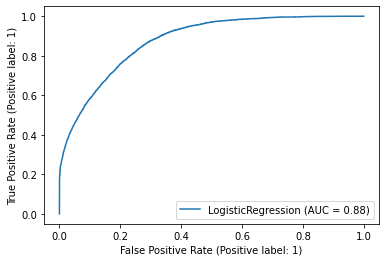

In [116]:
plot_roc_curve(logistic,X,y) # AUC - 0.81

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(y,logisticpredict)

array([[49898,   242],
       [ 3494,  1174]], dtype=int64)

## we got less recall and f1-score.

## we need to apply sampling techniques to balance the data

In [131]:
#we are using smote(over sampling technique) to balance the data
from imblearn.over_sampling import SMOTE

In [132]:
smote=SMOTE()

In [133]:
X_smote,y_smote=smote.fit_resample(X,y)

In [134]:
print(X.shape)
print(y.shape)
print(X_smote.shape)
print(y_smote.shape)

(54808, 53)
(54808,)
(100280, 53)
(100280,)


In [155]:
# Now we can able to see better recall and f1-score

In [143]:
# logistic regression

In [135]:
logit_smote=logistic.fit(X_smote,y_smote)

In [136]:
logit_smote_predict=logit_smote.predict(X_smote)

In [137]:
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     50140
           1       0.91      0.84      0.87     50140

    accuracy                           0.88    100280
   macro avg       0.88      0.88      0.88    100280
weighted avg       0.88      0.88      0.88    100280



In [138]:
pd.crosstab(y_smote,logit_smote_predict)

col_0,0,1
row_0,,
0,45995,4145
1,8158,41982


In [144]:
# Decision tree classifier

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
tree=DecisionTreeClassifier(max_depth=20)

In [147]:
treemodel=tree.fit(X_smote,y_smote)

In [148]:
treepredict=treemodel.predict(X_smote) 

In [149]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.94     50140
           1       0.92      0.98      0.95     50140

    accuracy                           0.95    100280
   macro avg       0.95      0.95      0.95    100280
weighted avg       0.95      0.95      0.95    100280



In [150]:
pd.crosstab(y_smote,treepredict)

col_0,0,1
row_0,,
0,45936,4204
1,1153,48987


In [151]:
#Random forest classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
RF=RandomForestClassifier(n_estimators=2000,max_depth=20)

In [154]:
RFmodel=RF.fit(X_smote,y_smote)

In [156]:
RFpredict=RFmodel.predict(X_smote)

In [157]:
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     50140
           1       0.93      0.99      0.96     50140

    accuracy                           0.96    100280
   macro avg       0.96      0.96      0.96    100280
weighted avg       0.96      0.96      0.96    100280



In [158]:
#xgboost classifier

In [160]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [161]:
from xgboost import XGBClassifier

In [162]:
xgmodel=XGBClassifier()

In [165]:
model=xgmodel.fit(X_smote,y_smote)

[21:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
xgpredict=model.predict(X_smote)

In [167]:
print(classification_report(y_smote,xgpredict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     50140
           1       0.96      0.93      0.95     50140

    accuracy                           0.95    100280
   macro avg       0.95      0.95      0.95    100280
weighted avg       0.95      0.95      0.95    100280



In [168]:
# we got good score with xgboost

In [169]:
#lets predict the test data with xgboost model

In [171]:
test_predict=model.predict(hrtestdf)

In [172]:
test_predict

array([0, 0, 0, ..., 0, 0, 1])

In [173]:
## combine this column to test data

In [176]:
hrtest["is_promoted"]=test_predict

In [178]:
# Now our model able to predict whether the employee going to promote or not
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
